<a href="https://colab.research.google.com/github/JithmiS/ml_7_assignment/blob/master/Fare_Classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train_csv = pd.read_csv('/content/train.csv', parse_dates = ['pickup_time','drop_time']).drop(columns='tripid')

In [ ]:
test = pd.read_csv('/content/test.csv', parse_dates = ['pickup_time','drop_time'])

In [ ]:
train_csv['fare'] = train_csv.fare.fillna(train_csv.fare.mean())
train_csv['additional_fare'] = train_csv.additional_fare.fillna(train_csv.additional_fare.mean())
train_csv['duration'] = train_csv.duration.fillna(train_csv.duration.mean())
train_csv['meter_waiting_till_pickup'] = train_csv.meter_waiting_till_pickup.fillna(train_csv.meter_waiting_till_pickup.mean())
train_csv['meter_waiting'] = train_csv.meter_waiting.fillna(train_csv.meter_waiting.mean())
train_csv['meter_waiting_fare'] = train_csv.meter_waiting_fare.fillna(train_csv.meter_waiting_fare.mean())

In [ ]:
# Absolute difference time
train_csv['abs_time'] = (train_csv['drop_time'] - train_csv['pickup_time']).abs()
test['abs_time'] = (test['drop_time'] - test['pickup_time']).abs()

In [ ]:
# Absolute difference in latitude and longitude
train_csv['abs_lat_diff'] = (train_csv['drop_lat'] - train_csv['pick_lat']).abs()
train_csv['abs_lon_diff'] = (train_csv['drop_lon'] - train_csv['pick_lon']).abs()

In [ ]:
train_csv['label'] = train_csv['label'].map({'correct':1,'incorrect':0})

In [ ]:
train_csv = train_csv.drop(['pickup_time', 'drop_time', 'pick_lat','pick_lon', 'drop_lat', 'drop_lon'], axis=1)

In [ ]:
# Create absolute differences
test['abs_lat_diff'] = (test['drop_lat'] - test['pick_lat']).abs()
test['abs_lon_diff'] = (test['drop_lon'] - test['pick_lon']).abs()

In [ ]:
# Save the id for submission
test_id = list(test.pop('tripid'))

In [ ]:
test = test.drop(['pickup_time', 'drop_time', 'pick_lat','pick_lon', 'drop_lat', 'drop_lon'], axis=1)
train_csv['time'] = (train_csv['abs_time'].dt.seconds.astype(int))
test['time'] = (test['abs_time'].dt.seconds.astype(int))
train_csv['distance'] = ((((train_csv['abs_lat_diff'])**2 + (train_csv['abs_lon_diff'])**2)**0.5)).abs()
test['distance'] = ((((test['abs_lat_diff'])**2 + (test['abs_lon_diff'])**2)**0.5)).abs()
train_csv = train_csv.drop(['abs_lat_diff','abs_lon_diff'], axis=1)
test = test.drop(['abs_lat_diff','abs_lon_diff'], axis=1)

Text(0.5, 1.05, 'Correlation of Features')

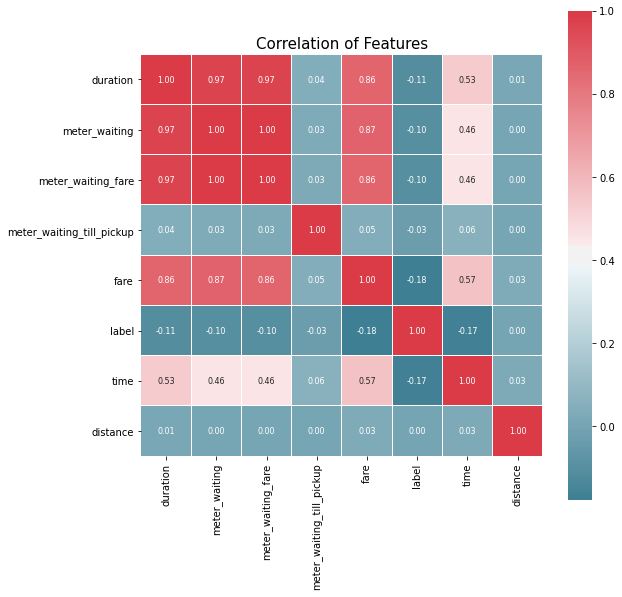

In [ ]:
corr = train_csv.iloc[:,1:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(9,9))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of Features', y=1.05, size=15)

In [ ]:
train_csv

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label,abs_time,time,distance
0,10.500000,834.000000,56.000000,0.000000,64.000000,270.32,1,00:14:00,14,45.869471
1,10.500000,791.000000,47.000000,0.000000,134.000000,197.85,1,00:13:00,13,28.500449
2,10.500000,1087.000000,80.000000,0.000000,61.000000,301.64,1,00:18:00,18,57.018769
3,10.500000,598.000000,271.000000,15.663800,68.000000,82.30,1,00:10:00,10,7.805665
4,13.719651,1702.858077,629.074231,32.057666,112.466832,358.39,1,00:17:00,17,73.716938
...,...,...,...,...,...,...,...,...,...,...
17171,10.500000,838.000000,93.000000,5.421900,451.000000,198.26,1,00:14:00,14,19.086969
17172,10.500000,2151.000000,428.000000,0.000000,39.000000,581.23,1,00:36:00,36,98.307324
17173,10.500000,263.000000,9.000000,0.000000,110.000000,76.20,1,00:04:00,4,9.404919
17174,10.500000,858.000000,115.000000,0.000000,317.000000,133.31,1,00:14:00,14,26.056776


In [ ]:
train_csv = train_csv.drop(['abs_time'], axis=1)
test = test.drop(['abs_time'], axis=1)

In [ ]:
train_csv = train_csv.drop(['meter_waiting_till_pickup'], axis=1)
test = test.drop(['meter_waiting_till_pickup'], axis=1)

In [ ]:
train_csv.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,fare,label,time,distance
0,10.500000,834.000000,56.000000,0.000000,270.32,1,840,0.045869
1,10.500000,791.000000,47.000000,0.000000,197.85,1,780,0.028500
2,10.500000,1087.000000,80.000000,0.000000,301.64,1,1080,0.057019
3,10.500000,598.000000,271.000000,15.663800,82.30,1,600,0.007806
4,13.719651,1702.858077,629.074231,32.057666,358.39,1,1020,0.073717


In [ ]:
predictors = train_csv.drop(['label'], axis=1)
target = train_csv['label']

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
X_train

,additional_fare,duration,meter_waiting,meter_waiting_fare,fare,time,distance
12974,10.5,1220.0,301.0,0.0000,230.71,1260,0.044885
6263,5.0,1380.0,738.0,43.0254,211.22,1380,0.000215
6042,10.5,453.0,74.0,4.3142,86.72,480,0.011898
14959,10.5,2315.0,284.0,0.0000,545.34,2340,0.111772
4402,10.5,763.0,67.0,0.0000,208.39,780,0.043374
...,...,...,...,...,...,...,...
9225,10.5,758.0,319.0,7.1672,162.75,780,0.014577
13123,10.5,418.0,13.0,0.0000,154.11,420,0.030418
9845,10.5,721.0,90.0,0.0000,125.65,720,0.009007
10799,10.5,496.0,12.0,0.0000,401.66,540,0.026959


In [ ]:
test.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,fare,time
0,10.5,924,42,2.4486,289.27,15
1,10.5,4249,20,0.0000,1912.70,71
2,10.5,1552,255,2.6588,394.00,26
3,10.5,462,16,0.0000,154.32,8
4,10.5,814,392,12.3692,147.47,14


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
Y_pred_xgb

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 94.18 %


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time

xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, Y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == Y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 93.77
Time consumed for training: 0.601
Time consumed for prediction: 0.01099 seconds


In [ ]:
pred = xgb.predict(test)
pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score

my_model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective= 'binary:logistic', random_state=72,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train, Y_train, verbose=False)


# Performance sur le train
train_y_pred = my_model.predict(X_train)
auc = roc_auc_score(Y_train, train_y_pred)
print("Performance sur le train : ", auc)

# Performance sur le test
test_y_pred = my_model.predict(X_test)
auc = roc_auc_score(Y_test, test_y_pred)
print("Performance sur le test : ", auc)

Performance sur le train :  0.8133938753207259
Performance sur le test :  0.7714800758064437


Best: -0.150815 using {'n_estimators': 360}
-0.161972 (0.007553) with: {'n_estimators': 100}
-0.158295 (0.007610) with: {'n_estimators': 120}
-0.155916 (0.007616) with: {'n_estimators': 140}
-0.154932 (0.007915) with: {'n_estimators': 160}
-0.153646 (0.008127) with: {'n_estimators': 180}
-0.152808 (0.008262) with: {'n_estimators': 200}
-0.152317 (0.008755) with: {'n_estimators': 220}
-0.151910 (0.008828) with: {'n_estimators': 240}
-0.152064 (0.009083) with: {'n_estimators': 260}
-0.151793 (0.009632) with: {'n_estimators': 280}
-0.151501 (0.009855) with: {'n_estimators': 300}
-0.151415 (0.010127) with: {'n_estimators': 320}
-0.151203 (0.010285) with: {'n_estimators': 340}
-0.150815 (0.010520) with: {'n_estimators': 360}
-0.151101 (0.010638) with: {'n_estimators': 380}
-0.151414 (0.010789) with: {'n_estimators': 400}
-0.151576 (0.011339) with: {'n_estimators': 420}
-0.151873 (0.011374) with: {'n_estimators': 440}
-0.152044 (0.011536) with: {'n_estimators': 460}
-0.152520 (0.011776) with

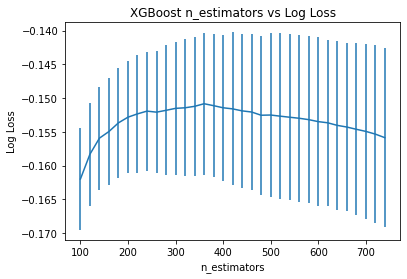

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

model = XGBClassifier(learning_rate =0.11, 
 n_estimators=340, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, 
 reg_alpha=1, reg_lambda=1, seed=27)

n_estimators = range(100, 750, 20)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train,Y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
 
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators.png')

# XGBoost Parameter Tuning

Tune **max_depth** and **min_child_weight**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.11, 
 n_estimators=360, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, 
 reg_alpha=1, reg_lambda=1, seed=27), 

 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,Y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 6.92378459,  6.77534695,  6.90897431, 10.95583296, 10.64486933,
         10.3590189 , 15.39748435, 14.4996213 , 14.23569584, 19.25953879,
         17.6206995 , 14.77405176]),
  'mean_score_time': array([0.08229113, 0.07956419, 0.076157  , 0.13775048, 0.13472772,
         0.12820292, 0.17531853, 0.18178086, 0.1647882 , 0.21931787,
         0.21804371, 0.13705921]),
  'mean_test_score': array([0.92739193, 0.92813643, 0.9281737 , 0.9273661 , 0.92567545,
         0.92826784, 0.92477609, 0.92550143, 0.92618416, 0.92352674,
         0.92355703, 0.92583686]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5, 1, 3, 5],
               mask=[False, False, False, False, False, False, False, Fa

In [ ]:
from sklearn.model_selection import GridSearchCV

param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}

gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.11, 
 n_estimators=360, max_depth=5,
 min_child_weight=5, gamma=0.1, subsample=0.8, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, 
 reg_alpha=1, reg_lambda=1, seed=27), 

 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([ 8.36043692,  8.65411839,  8.59126973, 10.48239012, 10.36269813,
         10.27960267, 12.55528121, 12.26987042, 10.60799737]),
  'mean_score_time': array([0.11261744, 0.11457586, 0.116996  , 0.12641392, 0.13587222,
         0.12003131, 0.17625012, 0.13784924, 0.10501552]),
  'mean_test_score': array([0.92836451, 0.9285859 , 0.92843622, 0.92773419, 0.92826784,
         0.9286591 , 0.92667921, 0.92675954, 0.92693579]),
  'param_max_depth': masked_array(data=[4, 4, 4, 5, 5, 5, 6, 6, 6],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[4, 5, 6, 4, 5, 6, 4, 5, 6],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 4, 'min_child_weight': 4},
   {'max_depth': 4, 'min_child_weig

Tune **Gamma**

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.11, 
 n_estimators=360, max_depth=5,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, 
 reg_alpha=1, reg_lambda=1, seed=27), 

 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,Y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([10.35997181, 10.48445172, 10.28521018, 10.31985736,  8.86204281]),
  'mean_score_time': array([0.13713412, 0.12993898, 0.1430676 , 0.13385215, 0.09495034]),
  'mean_test_score': array([0.92801037, 0.9286591 , 0.92878175, 0.92835055, 0.92746558]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'rank_test_score': array([4, 2, 1, 3, 5], dtype=int32),
  'split0_test_score': array([0.92333015, 0.92593604, 0.92434875, 0.92280228, 0.92141024]),
  'split1_test_score': array([0.92322918, 0.92344002, 0.92374739, 0.92454623, 0.92437622]),
  'split2_test_score': array([0.9290557 , 0.92802002, 0.92970606, 0.92960806, 0.9286637 ]),
  'split3_test_score': array([0.93907096, 0.94080526, 0.93937387, 0.937647  , 0.93841021]),
  'split4_test_score':

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

model = XGBClassifier(learning_rate =0.11, 
 n_estimators=360, max_depth=5,
 min_child_weight=6, gamma=0.03, subsample=0.8, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, 
 reg_alpha=1, reg_lambda=1, seed=27)

model.fit(X_train, Y_train, verbose=False)


# Performance sur le train
train_y_pred = model.predict(X_train)
auc = roc_auc_score(Y_train, train_y_pred)
print("Performance sur le train : ", auc)

# Performance sur le test
test_y_pred = model.predict(X_test)
auc = roc_auc_score(Y_test, test_y_pred)
print("Performance sur le test : ", auc)



Performance sur le train :  0.870083982704552
Performance sur le test :  0.8060215118285055


Tune subsample and colsample_bytree

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,12)],
 'colsample_bytree':[i/10.0 for i in range(6,12)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.11, 
 n_estimators=360, max_depth=5,
 min_child_weight=6, gamma=0.03, subsample=0.8, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, 
 reg_alpha=1, reg_lambda=1, seed=27), 

 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train, Y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([ 9.41201992,  9.31939888,  9.49306254,  9.06080389,  8.80438995,
          0.04369555,  9.68970547,  9.41239123,  9.42590098,  9.23341041,
          8.97515621,  0.05229292, 10.36294746, 10.49870973, 10.32272468,
         10.10856318,  9.73859644,  0.03477645, 11.45654411, 11.42140169,
         11.38384452, 11.0679945 , 10.5893167 ,  0.0487195 , 12.37861071,
         12.33928413, 12.25075197, 11.94183688,  9.87260032,  0.04355097,
          0.04094462,  0.03459191,  0.02603602,  0.0329617 ,  0.02507539,
          0.01880507]),
  'mean_score_time': array([0.12671571, 0.12328877, 0.13145666, 0.11894445, 0.13028808,
         0.        , 0.12710629, 0.12733951, 0.14992018, 0.12111931,
         0.12844095, 0.        , 0.11578646, 0.14959154, 0.17780943,
         0.12345567, 0.12687578, 0.        , 0.15112724, 0.13060722,
         0.13290896, 0.14252148, 0.13501272, 0.        , 0.11764393,
         0.13083916, 0.12652106, 0.13031025, 0.09925838, 0.        ,
        

In [ ]:
param_test4 = {
 'subsample':[i/100.0 for i in range(75,110,5)],
 'colsample_bytree':[i/100.0 for i in range(75,110,5)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.11, 
 n_estimators=360, max_depth=5,
 min_child_weight=6, gamma=0.03, subsample=0.9, colsample_bytree=0.9,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, 
 reg_alpha=1, reg_lambda=1, seed=27), 

 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train, Y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([10.36622863, 10.41220202, 10.27724891, 10.09375987,  9.99242449,
          9.5901248 ,  0.08745122, 10.51006184, 10.20225892, 10.25075588,
         10.15087223,  9.80606599,  9.90023293,  0.0391027 , 10.51771684,
         10.3056994 , 10.20059161, 10.13928666,  9.89683151,  9.73598943,
          0.020401  , 11.39628592, 11.23088989, 11.28253732, 11.11463623,
         10.93866382, 10.29806428,  0.08688383, 11.31692653, 11.33020954,
         11.20781603, 10.97981529, 11.00653768, 10.55554142,  0.02563128,
         12.35832229, 12.13579674, 12.15366464, 12.08416014, 11.50949082,
         10.18039136,  0.04662933,  0.03009481,  0.02569876,  0.02986135,
          0.01930118,  0.0332191 ,  0.02505941,  0.04364166]),
  'mean_score_time': array([0.13167648, 0.13765893, 0.14145546, 0.11736302, 0.12489653,
         0.13058329, 0.        , 0.13675332, 0.15151715, 0.15017958,
         0.1353765 , 0.13107285, 0.12634258, 0.        , 0.13739524,
         0.13831453, 0.13313

Tuning Regularization Parameters

In [ ]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.11, 
 n_estimators=360, max_depth=5,
 min_child_weight=6, gamma=0.03, subsample=0.9, colsample_bytree=0.9,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, 
 reg_alpha=1, reg_lambda=1, seed=27), 

 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch6.fit(X_train, Y_train)
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

({'mean_fit_time': array([11.07138186, 11.07887702, 11.20926065, 11.23835864,  3.92673397]),
  'mean_score_time': array([0.11374106, 0.13949709, 0.1126389 , 0.14168906, 0.02190833]),
  'mean_test_score': array([0.92755913, 0.92732022, 0.92664224, 0.92935193, 0.86319773]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'rank_test_score': array([2, 3, 4, 1, 5], dtype=int32),
  'split0_test_score': array([0.92254466, 0.92134343, 0.92339993, 0.92443413, 0.82996769]),
  'split1_test_score': array([0.92289286, 0.92426857, 0.92197745, 0.92746989, 0.87517818]),
  'split2_test_score': array([0.92947591, 0.92913143, 0.92878249, 0.93331423, 0.87878709]),
  'split3_test_score': array([0.93556525, 0.9368927 , 0.93466098, 0.9368437 , 0.86527725

In [ ]:
#reg_lambda=1
param_test7 = {
 'reg_alpha':[0.5,0.75,1,1.25,1.5]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.11, 
 n_estimators=360, max_depth=5,
 min_child_weight=6, gamma=0.03, subsample=0.9, colsample_bytree=0.9,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, 
 reg_alpha=1, reg_lambda=1, seed=27), 

 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)


gsearch7.fit(X_train, Y_train)
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

({'mean_fit_time': array([10.85836997, 11.01512723, 11.54575653, 11.34798412,  9.83777757]),
  'mean_score_time': array([0.13388605, 0.12439737, 0.13441877, 0.1335937 , 0.09458413]),
  'mean_test_score': array([0.92804408, 0.92860787, 0.92935193, 0.92876571, 0.92919498]),
  'param_reg_alpha': masked_array(data=[0.5, 0.75, 1, 1.25, 1.5],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0.5},
   {'reg_alpha': 0.75},
   {'reg_alpha': 1},
   {'reg_alpha': 1.25},
   {'reg_alpha': 1.5}],
  'rank_test_score': array([5, 4, 1, 3, 2], dtype=int32),
  'split0_test_score': array([0.92191658, 0.92254392, 0.92443413, 0.92109694, 0.92304654]),
  'split1_test_score': array([0.92489591, 0.92301536, 0.92746989, 0.92455663, 0.92808016]),
  'split2_test_score': array([0.93010771, 0.9312889 , 0.93331423, 0.93278117, 0.93380571]),
  'split3_test_score': array([0.93748812, 0.93695284, 0.9368437 , 0.93803529, 0.93520221])

In [ ]:
#reg_lambda=1
param_test8 = {
 'reg_lambda':[0.5,0.75,1,1.25,1.5]
}
gsearch8 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.11, 
 n_estimators=360, max_depth=5,
 min_child_weight=6, gamma=0.03, subsample=0.9, colsample_bytree=0.9,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, 
 reg_alpha=1, reg_lambda=1, seed=27), 

 param_grid = param_test8, scoring='roc_auc',n_jobs=4,iid=False, cv=5)


gsearch8.fit(X_train, Y_train)
gsearch8.cv_results_, gsearch8.best_params_, gsearch8.best_score_

({'mean_fit_time': array([8.05205898, 7.8306807 , 8.12936192, 8.06452904, 7.08247995]),
  'mean_score_time': array([0.11390443, 0.09058571, 0.10103331, 0.1154079 , 0.07776346]),
  'mean_test_score': array([0.92948823, 0.92840207, 0.92999486, 0.92954228, 0.92870543]),
  'param_reg_lambda': masked_array(data=[0.5, 0.75, 1, 1.25, 1.5],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_lambda': 0.5},
   {'reg_lambda': 0.75},
   {'reg_lambda': 1},
   {'reg_lambda': 1.25},
   {'reg_lambda': 1.5}],
  'rank_test_score': array([3, 5, 1, 2, 4], dtype=int32),
  'split0_test_score': array([0.92174136, 0.92281194, 0.92380975, 0.92356252, 0.92038645]),
  'split1_test_score': array([0.92655077, 0.92685516, 0.92677424, 0.92670816, 0.92695316]),
  'split2_test_score': array([0.93110701, 0.93136611, 0.9300936 , 0.93032227, 0.92987533]),
  'split3_test_score': array([0.93988317, 0.937892  , 0.93968569, 0.93808651, 0.93888239]

In [ ]:
#reg_lambda=1
param_test8 = {
 'colsample_bylevel':[i/10.0 for i in range(6,12)]
}
gsearch8 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.11, 
 n_estimators=360, max_depth=5,
 min_child_weight=6, gamma=0.03, subsample=0.9, colsample_bytree=0.9,
 objective= 'binary:logistic', nthread=2, scale_pos_weight=1, 
 reg_alpha=1, reg_lambda=1, seed=27, booster='gbtree', nrounds=100, eta=0.1, 
 colsample_bylevel = 0.7), 

 param_grid = param_test8, scoring='roc_auc',n_jobs=4,iid=False, cv=5)


gsearch8.fit(X_train, Y_train)
gsearch8.cv_results_, gsearch8.best_params_, gsearch8.best_score_

({'mean_fit_time': array([5.40549471e+01, 4.16566921e+01, 3.96261737e+01, 4.62183784e+01,
         3.97706204e+01, 4.33899403e-02]),
  'mean_score_time': array([0.15598192, 0.14504862, 0.15131021, 0.14943938, 0.10939856,
         0.        ]),
  'mean_test_score': array([0.92757071, 0.92956262, 0.92956262, 0.92810495, 0.92935193,
                nan]),
  'param_colsample_bylevel': masked_array(data=[0.6, 0.7, 0.8, 0.9, 1.0, 1.1],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'colsample_bylevel': 0.6},
   {'colsample_bylevel': 0.7},
   {'colsample_bylevel': 0.8},
   {'colsample_bylevel': 0.9},
   {'colsample_bylevel': 1.0},
   {'colsample_bylevel': 1.1}],
  'rank_test_score': array([5, 1, 1, 4, 3, 6], dtype=int32),
  'split0_test_score': array([0.92257436, 0.92374516, 0.92374516, 0.92254318, 0.92443413,
                nan]),
  'split1_test_score': array([0.92557671, 0.9278604 , 0.9278604 , 0.92432351,

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_auc_score

model = XGBClassifier(learning_rate =0.12, 
 n_estimators=360, max_depth=5,
 min_child_weight=6, gamma=0.03, subsample=0.9, colsample_bytree=0.9,
 objective= 'binary:logistic', nthread=2, scale_pos_weight=1, 
 reg_alpha=1, reg_lambda=1, booster='gbtree', nrounds=50, eta=0.2, 
 colsample_bylevel = 0.7)

model.fit(X_train, Y_train, verbose=False)


# Performance sur le train
train_y_pred = model.predict(X_train)
auc = roc_auc_score(Y_train, train_y_pred)
print("Performance sur le train : ", auc)

# Performance sur le test
test_y_pred = model.predict(X_test)
auc = roc_auc_score(Y_test, test_y_pred)
print("Performance sur le test : ", auc)



Performance sur le train :  0.8699586619785232
Performance sur le test :  0.8120915277798613


base_score=0.5, 
booster='gbtree', 
colsample_bylevel=1, 
max_delta_step=0,
missing=None,
n_jobs=1,
random_state=72,
silent=True,



In [ ]:
result = model.predict(test)
result

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
test_csv_2 = pd.read_csv('/content/test.csv')
summission = pd.concat([test_csv_2['tripid'], pd.DataFrame(result)], axis=1)
summission.columns = ['tripid', 'prediction']
summission.to_csv('submission_tuned_2.csv', encoding='utf-8', index = False)